# ASSIGNMENT: NIR-SPECTRA

## 1) Definition of Tast: Predicting the quality of interest from the spectral data

Near infra-red spectroscopy is a techinique used in a number of industries, including food, and agrochemical 
quality control. The goal is to determine a quality of interest, for instance, protein content of milk, from 
spectrometer measurements

More information [Near-Infrared-Spectroscopy](https://en.wikipedia.org/wiki/Near-infrared_spectroscopy)

The data for this assignment consists of following consists of the following columns (in this particular order):
>* Sample number
* The quantity to predict
* The rest of the columns are the spectral data


**Your task:**
>* Perform an explatorory analysis of the data
* Develop a predictive model for the second column and report its accuracy in terms of R-squared and RMSE error
* Explain your model

We suggest to use Jupyter notebook for this assignment

## 2) Importing the necessary libraries

In [117]:
%matplotlib inline
import numpy as np
import pandas as pd
import torch
import seaborn as sns
import matplotlib.pyplot as plt


## 3) Downloading the data

This cell below downloads the data from the github project and then extracts 
extracts the csv file and save it into the data folder
ONLY ONCE TO BE EXECUTED!!!

In [25]:
%mkdir data
!wget -O - https://github.com/datamole-ai/NirSpectra/archive/master.zip | jar xv

import zipfile
with zipfile.ZipFile("NirSpectra-master/cal 2018.csv.zip","r") as zf:
    zf.extractall('data')    

--2021-02-02 15:29:54--  https://github.com/datamole-ai/NirSpectra/archive/master.zip
Auflösen des Hostnamens github.com (github.com) … 140.82.121.4
Verbindungsaufbau zu github.com (github.com)|140.82.121.4|:443 … verbunden.
HTTP-Anforderung gesendet, auf Antwort wird gewartet … 302 Found
Platz: https://codeload.github.com/datamole-ai/NirSpectra/zip/master [folgend]
--2021-02-02 15:29:55--  https://codeload.github.com/datamole-ai/NirSpectra/zip/master
Auflösen des Hostnamens codeload.github.com (codeload.github.com) … 140.82.121.9
Verbindungsaufbau zu codeload.github.com (codeload.github.com)|140.82.121.9|:443 … verbunden.
HTTP-Anforderung gesendet, auf Antwort wird gewartet … 200 OK
Länge: nicht spezifiziert [application/zip]
Wird in »STDOUT« gespeichert.

-                       [<=>                 ]       0  --.-KB/s                 erstellt: NirSpectra-master/
 vergrößert: NirSpectra-master/.gitignore
 vergrößert: NirSpectra-master/README.adoc
-                       [            

# 3) Reading the Data

In [133]:
df=pd.read_csv("data/cal 2018.csv",sep=";",header=None)

In [134]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,672,673,674,675,676,677,678,679,680,681
0,1,12.740000,0.597482,0.595978,0.593623,0.590840,0.587451,0.583092,0.578666,0.572134,...,0.119548,0.118791,0.118170,0.117522,0.116919,0.116422,0.115861,0.115367,0.114876,0.114548
1,2,35.721199,0.954192,0.953237,0.952002,0.950426,0.948382,0.946138,0.943543,0.940570,...,0.287561,0.285157,0.282881,0.280734,0.278929,0.277288,0.275735,0.274133,0.272768,0.271574
2,3,12.000000,0.611137,0.609566,0.607430,0.604767,0.601434,0.597316,0.592598,0.586992,...,0.116174,0.115513,0.114890,0.114354,0.113720,0.113223,0.112702,0.112212,0.111764,0.111432
3,4,13.844976,0.342604,0.343687,0.344696,0.345664,0.346574,0.347402,0.348187,0.348870,...,0.084568,0.084324,0.084156,0.084029,0.083939,0.083858,0.083770,0.083700,0.083641,0.083626
4,5,19.299999,0.760703,0.760871,0.761004,0.761058,0.761009,0.760830,0.760615,0.760404,...,0.309897,0.307698,0.305618,0.303555,0.301619,0.299720,0.297918,0.296330,0.294762,0.293355


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3908 entries, 0 to 3907
Columns: 682 entries, 0 to 681
dtypes: float64(681), int64(1)
memory usage: 20.3 MB


In [136]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,672,673,674,675,676,677,678,679,680,681
count,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,...,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000
mean,1954.500000,31.247135,0.673552,0.673042,0.672289,0.671280,0.669945,0.668317,0.666428,0.664173,...,0.180276,0.179063,0.177920,0.176871,0.175921,0.175057,0.174249,0.173527,0.172905,0.172366
std,1128.286754,20.044317,0.177404,0.176938,0.176444,0.175918,0.175353,0.174777,0.174194,0.173637,...,0.099334,0.098570,0.097812,0.097090,0.096401,0.095744,0.095132,0.094552,0.094031,0.093534
min,1.000000,3.060644,0.225217,0.226202,0.227226,0.228200,0.229130,0.230069,0.230942,0.231759,...,0.031046,0.030999,0.030906,0.030781,0.030699,0.030650,0.030605,0.030532,0.030445,0.030424
25%,977.750000,13.096103,0.561772,0.560873,0.560031,0.558322,0.556361,0.553321,0.550164,0.545606,...,0.099678,0.099215,0.098735,0.098217,0.097774,0.097524,0.097338,0.097088,0.097002,0.096858
50%,1954.500000,22.770000,0.715334,0.714612,0.714208,0.713636,0.712055,0.710524,0.708472,0.705815,...,0.155023,0.154046,0.153240,0.152510,0.151948,0.151446,0.151025,0.150611,0.150263,0.149869
75%,2931.250000,51.250000,0.813234,0.812471,0.812104,0.811087,0.809613,0.807882,0.806053,0.804372,...,0.271536,0.269194,0.267222,0.265850,0.264328,0.262811,0.261621,0.260589,0.259669,0.258567
max,3908.000000,76.603981,1.177985,1.175869,1.173260,1.169968,1.166016,1.161484,1.156248,1.150484,...,0.426555,0.423630,0.420794,0.418019,0.415396,0.412957,0.410568,0.408270,0.406054,0.403849


## 4) Explarotory analysis of the data

In [137]:
#Check if all elements are numeric
df[df.applymap(np.isreal).all(1)]

,0,1,2,3,4,5,6,7,8,9,...,672,673,674,675,676,677,678,679,680,681
0,1,12.740000,0.597482,0.595978,0.593623,0.590840,0.587451,0.583092,0.578666,0.572134,...,0.119548,0.118791,0.118170,0.117522,0.116919,0.116422,0.115861,0.115367,0.114876,0.114548
1,2,35.721199,0.954192,0.953237,0.952002,0.950426,0.948382,0.946138,0.943543,0.940570,...,0.287561,0.285157,0.282881,0.280734,0.278929,0.277288,0.275735,0.274133,0.272768,0.271574
2,3,12.000000,0.611137,0.609566,0.607430,0.604767,0.601434,0.597316,0.592598,0.586992,...,0.116174,0.115513,0.114890,0.114354,0.113720,0.113223,0.112702,0.112212,0.111764,0.111432
3,4,13.844976,0.342604,0.343687,0.344696,0.345664,0.346574,0.347402,0.348187,0.348870,...,0.084568,0.084324,0.084156,0.084029,0.083939,0.083858,0.083770,0.083700,0.083641,0.083626
4,5,19.299999,0.760703,0.760871,0.761004,0.761058,0.761009,0.760830,0.760615,0.760404,...,0.309897,0.307698,0.305618,0.303555,0.301619,0.299720,0.297918,0.296330,0.294762,0.293355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3903,3904,69.165253,0.599928,0.599116,0.598073,0.596783,0.595168,0.593249,0.591056,0.588556,...,0.094501,0.093862,0.093302,0.092799,0.092455,0.092221,0.092066,0.091964,0.091987,0.092047
3904,3905,21.452824,0.382061,0.383178,0.384258,0.385266,0.386223,0.387153,0.388005,0.388759,...,0.124166,0.123575,0.123078,0.122600,0.122209,0.121834,0.121487,0.121160,0.120915,0.120732
3905,3906,15.000000,0.701410,0.701482,0.701492,0.701444,0.701314,0.701174,0.700974,0.700728,...,0.297263,0.295085,0.292983,0.291007,0.289066,0.287271,0.285639,0.284069,0.282614,0.281286
3906,3907,38.591709,0.544052,0.542243,0.539978,0.537174,0.533819,0.529881,0.525374,0.520326,...,0.054292,0.053966,0.053650,0.053367,0.053154,0.052936,0.052684,0.052489,0.052314,0.052154


In [138]:
#Check the number of non numeric elements
df[~df.applymap(np.isreal).all(1)]

,0,1,2,3,4,5,6,7,8,9,...,672,673,674,675,676,677,678,679,680,681


In [9]:
sns.set_style('whitegrid')

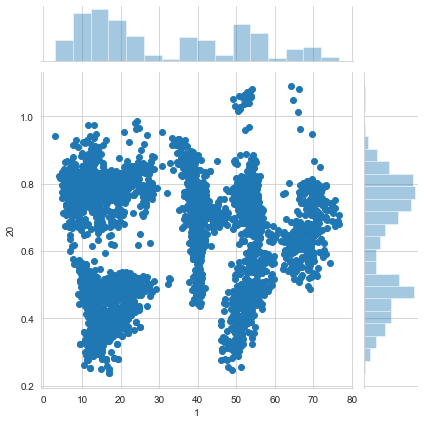

In [10]:
sns.jointplot(x=1, y=20,data=df)

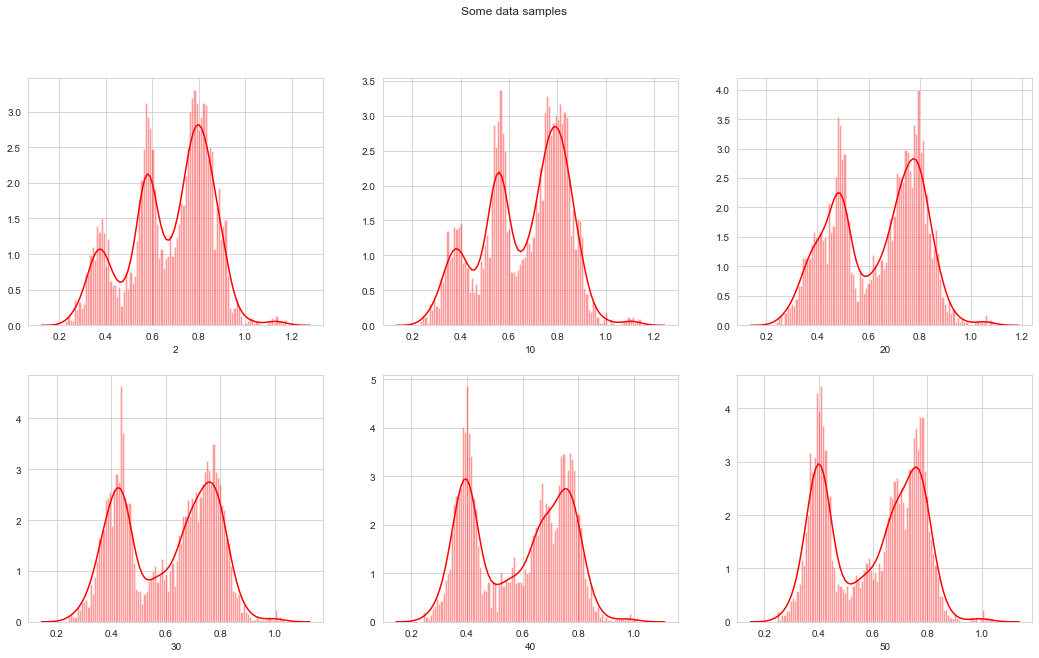

In [18]:
fig, axes0 = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Some data samples')
sns.distplot(df[2], bins=100, color='red',ax=axes0[0,0])
sns.distplot(df[10], bins=100, color='red',ax=axes0[0,1])
sns.distplot(df[20], bins=100, color='red',ax=axes0[0,2])
sns.distplot(df[30], bins=100, color='red',ax=axes0[1,0])
sns.distplot(df[40], bins=100, color='red',ax=axes0[1,1])
sns.distplot(df[50], bins=100, color='red',ax=axes0[1,2])

In [90]:
#fig, axes = plt.subplots(2, 3, figsize=(18, 10))
#fig.suptitle('Some data samples')
#sns.jointplot(x=1, y=2,data=df, kind='kde',ax=axes[0, 0])
#sns.jointplot(x=1, y=10,data=df, kind='kde',ax=axes[0, 1])
#sns.jointplot(x=1, y=20,data=df, kind='kde',ax=axes[0, 2])
#sns.jointplot(x=1, y=30,data=df, kind='kde',ax=axes[1, 0])
#sns.jointplot(x=1, y=40,data=df, kind='kde',ax=axes[1, 1])
#sns.jointplot(x=1, y=50,data=df, kind='kde',ax=axes[1, 2])

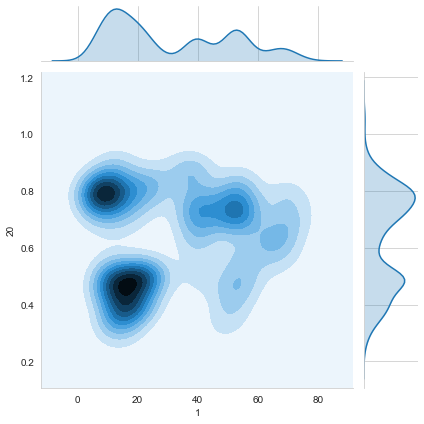

In [151]:
sns.jointplot(x=1, y=20,data=df, kind='kde')

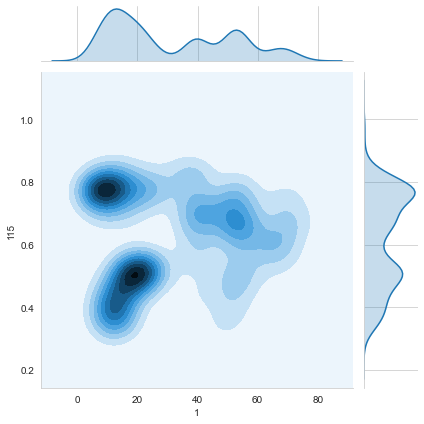

In [154]:
sns.jointplot(x=1, y=115,data=df, kind='kde')

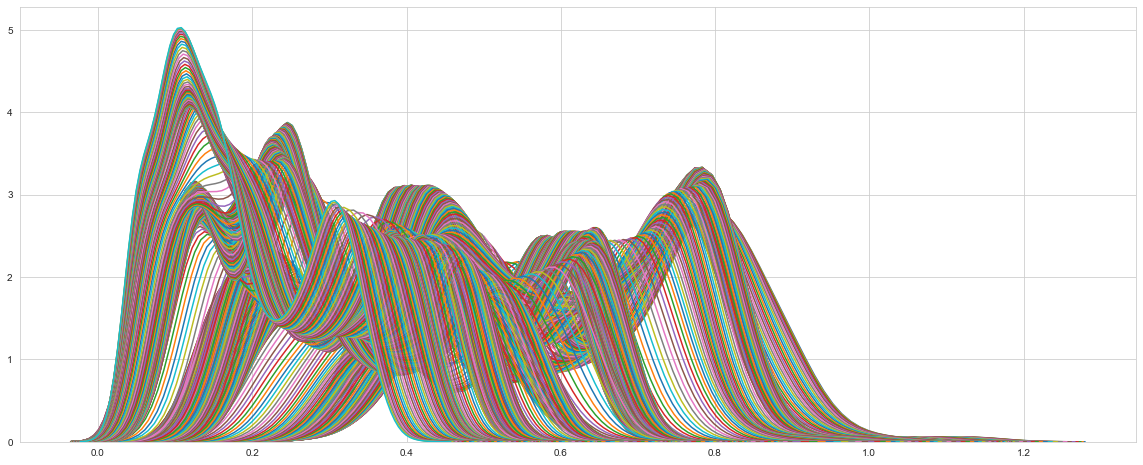

In [219]:
plt.figure(figsize=(20,8))
for i in range(2,682):
    #sns.distplot(df[i], bins=200)
    sns.kdeplot(df[i],legend=False)

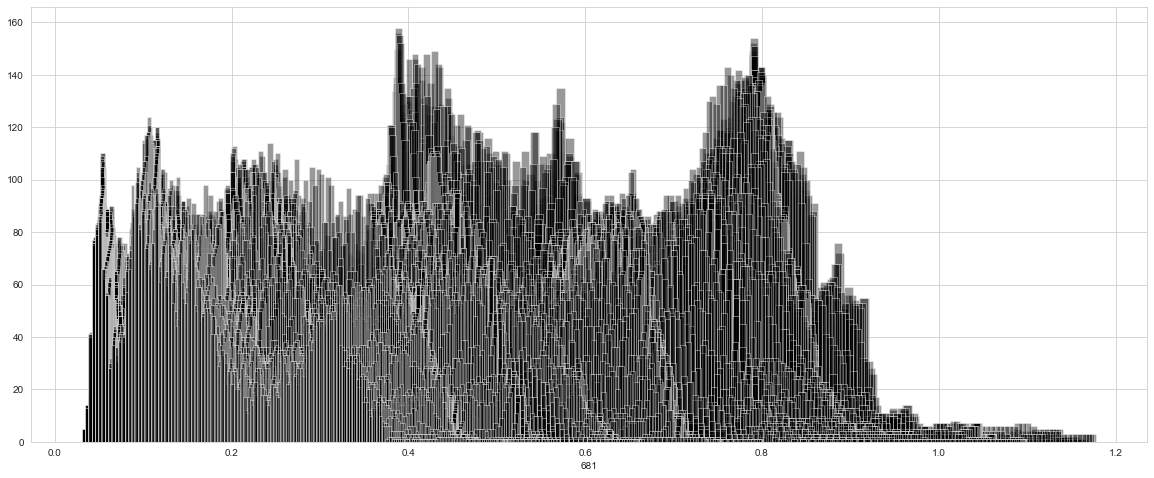

In [178]:
plt.figure(figsize=(20,8))
for i in range(2,682):
    sns.distplot(df[i], bins=100,kde=False, color='black')

/home/faruk/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


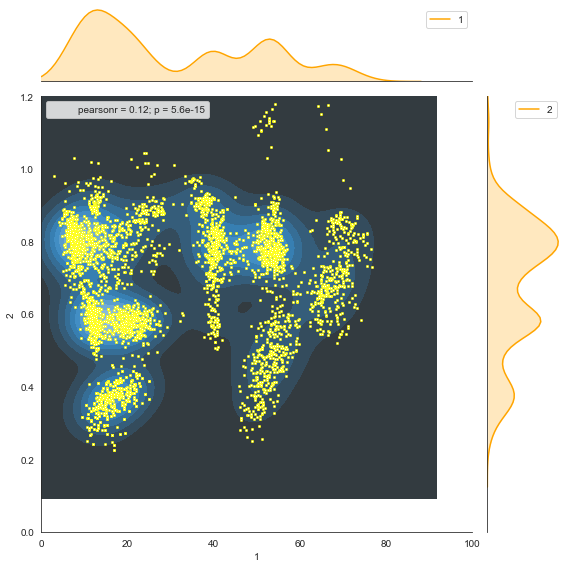

In [282]:
import matplotlib.pyplot as plt
import matplotlib.animation
import seaborn as sns
import numpy as np
import scipy

def get_data(i=0):
    #x,y = np.random.normal(loc=i,scale=3,size=(2, 260))
    x=df[1]
    y=df[i+2]
    return x,y

x,y = get_data()
g = sns.JointGrid(x=x, y=y, height=8)
#lim = (-10,10)

def prep_axes(g, xlim, ylim):
    g.ax_joint.clear()
    g.ax_joint.set_xlim(xlim)
    g.ax_joint.set_ylim(ylim)
    g.ax_marg_x.clear()
    g.ax_marg_x.set_xlim(xlim)
    g.ax_marg_y.clear()
    g.ax_marg_y.set_ylim(ylim)
    plt.setp(g.ax_marg_x.get_xticklabels(), visible=False)
    plt.setp(g.ax_marg_y.get_yticklabels(), visible=False)
    plt.setp(g.ax_marg_x.yaxis.get_majorticklines(), visible=False)
    plt.setp(g.ax_marg_x.yaxis.get_minorticklines(), visible=False)
    plt.setp(g.ax_marg_y.xaxis.get_majorticklines(), visible=False)
    plt.setp(g.ax_marg_y.xaxis.get_minorticklines(), visible=False)
    plt.setp(g.ax_marg_x.get_yticklabels(), visible=False)
    plt.setp(g.ax_marg_y.get_xticklabels(), visible=False)


def animate(i):
    g.x, g.y = get_data(i)
    prep_axes(g, (0, 100), (0, 1.2))
    #g.plot_joint(sns.kdeplot, cmap="Purples_d")
    g.plot_joint(sns.kdeplot, cmap="Blues_d", shade=True)
    g.plot_joint(sns.scatterplot,color="white", edgecolor="yellow",s=5)
    g.plot_marginals(sns.kdeplot, color="orange", shade=True)
    g.annotate(scipy.stats.pearsonr)

#frames=np.sin(np.linspace(0,2*np.pi,17))*5
ani = matplotlib.animation.FuncAnimation(g.fig, animate, frames=682, repeat=True)

plt.show()

## 5) Split the data into a training, a testing set and validation set

We'll split the data into 3 sets, one for training, one for testing and one for validating as 
the network is being trained and tested.


In [168]:
features = df.drop([0,1],axis=1)
targets = df[1]

split_frac = 0.8

## split the data into a training validation and test data (features, labels x and y)
split_idx = int(len(features)*split_frac)
train_x, remaining_x = features[:split_idx], features[split_idx:]
train_y, remaining_y = targets[:split_idx], targets[split_idx:]


test_idx = int(len(remaining_x)*0.5)
val_x, test_x = remaining_x[:test_idx], remaining_x[test_idx:] 
val_y, test_y = remaining_y[:test_idx], remaining_y[test_idx:]

# print out the shapes of your resultant data
print("\t\t\tfeature shapes:")
print("Train set: \t\t{}".format(train_x.shape),
     "\nValidation set: \t{}".format(val_x.shape), 
     "\nTest set: \t\t{}".format(test_x.shape))

			feature shapes:
Train set: 		(3126, 680) 
Validation set: 	(391, 680) 
Test set: 		(391, 680)


In [171]:
train_x.values

array([[0.59748155, 0.59597796, 0.59362256, ..., 0.11536655, 0.114876  ,
        0.11454818],
       [0.95419228, 0.95323746, 0.95200209, ..., 0.27413311, 0.27276811,
        0.27157426],
       [0.61113731, 0.60956609, 0.60743037, ..., 0.11221184, 0.11176399,
        0.11143245],
       ...,
       [0.26546129, 0.26655737, 0.26766371, ..., 0.05697601, 0.0568503 ,
        0.05681449],
       [0.63391583, 0.63270578, 0.63115627, ..., 0.10560846, 0.10565975,
        0.10576352],
       [0.46588551, 0.46612983, 0.46630106, ..., 0.10845628, 0.10824579,
        0.10808609]])

# 6) Dataloaders and Batching

In [250]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(train_x.values).float(), torch.from_numpy(train_y.values).float())
valid_data = TensorDataset(torch.from_numpy(val_x.values).float(), torch.from_numpy(val_y.values).float())
test_data = TensorDataset(torch.from_numpy(test_x.values).float(), torch.from_numpy(test_y.values).float())

# dataloaders
batch_size = 128

# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=False, batch_size=batch_size)

In [199]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([128, 680])
Sample input: 
 tensor([[0.5473, 0.5450, 0.5420,  ..., 0.0763, 0.0760, 0.0758],
        [0.5460, 0.5439, 0.5412,  ..., 0.0914, 0.0911, 0.0909],
        [0.5129, 0.5131, 0.5133,  ..., 0.1662, 0.1660, 0.1659],
        ...,
        [0.6785, 0.6769, 0.6749,  ..., 0.0873, 0.0874, 0.0875],
        [0.5923, 0.5922, 0.5917,  ..., 0.0742, 0.0738, 0.0736],
        [0.7301, 0.7303, 0.7305,  ..., 0.3149, 0.3134, 0.3121]])

Sample label size:  torch.Size([128])
Sample label: 
 tensor([11.7600, 13.7000, 55.8492, 51.1584,  9.9700, 38.3808, 19.0869, 26.5000,
        12.6000, 18.3980,  9.8600, 54.4715, 39.3713, 17.5900, 12.5000, 44.4561,
        44.1043, 71.3480, 11.7305, 54.8098, 59.0794, 41.6589, 16.8800, 12.0800,
        67.5664,  7.7400, 39.8826, 39.9640, 51.7978, 14.9143, 50.7986, 14.3000,
        53.0495, 65.9781, 22.1903, 39.7314, 40.4520, 53.3333, 68.2492,  9.0200,
        17.2888, 12.1500, 51.9208, 22.3400, 13.0806, 18.7000,  5.3411, 45.1609,
        

## 6) Transforming into pytorch tensors

In [183]:
#generate Tensor datasets


## 6) Models which are used for the Prediction

In [184]:
train_features_new.shape

(2188, 680)

In [200]:
import torch.nn as nn
import torch.nn.functional as F

# define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # number of hidden nodes in each layer (512)
        hidden_1 = 2000
        hidden_2 = 2000
        # linear layer (784 -> hidden_1)
        self.fc1 = nn.Linear(680, hidden_1)
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(hidden_1, hidden_2)
        # linear layer (n_hidden -> 10)
        self.fc3 = nn.Linear(hidden_2, 1)
        # dropout layer (p=0.2)
        # dropout prevents overfitting of data
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc2(x))
        # add dropout layer
        x = self.dropout(x)
        # add output layer
        x = self.fc3(x)
        return x

# initialize the NN
model = Net()
print(model)
    

Net(
  (fc1): Linear(in_features=680, out_features=2000, bias=True)
  (fc2): Linear(in_features=2000, out_features=2000, bias=True)
  (fc3): Linear(in_features=2000, out_features=1, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


## Specify Loss Function and Optimizer

In [290]:
class RMSELoss(nn.Module):
    def __init__(self, eps=1e-8):
        super().__init__()
        self.mse = nn.MSELoss()
        self.eps = eps
        
    def forward(self,yhat,y):
        loss = torch.sqrt(self.mse(yhat,y) + self.eps)
        return loss

In [303]:
class R_SquaredLoss(nn.Module):
    def __init__(self, eps=1e-8):
        super().__init__()
        self.mse = nn.MSELoss()
        self.eps = eps
        
    def forward(self,yhat,y):
        loss = 1 - (self.mse(yhat,y) / self.mse(y, torch.mean(y)))   #self.mse(y,torch.mean(y)))
        return loss

In [304]:
# specify loss function (categorical cross-entropy)
#criterion = nn.MSELoss()
criterion = RMSELoss()
criterion_rsquared=R_SquaredLoss()

# specify optimizer (stochastic gradient descent) and learning rate = 0.01
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [209]:
# number of epochs to train the model
n_epochs = 400

# initialize tracker for minimum validation loss
valid_loss_min = np.Inf # set initial "min" to infinity

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train() # prep model for training
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output.view(-1), target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
    #print('Lossssssss: ', train_loss/len(train_loader.sampler))

    # print training/validation statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.sampler)
        
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch+1, train_loss))
    
    torch.save(model.state_dict(), 'model.pt')

Epoch: 1 	Training Loss: 4.674577
Epoch: 2 	Training Loss: 4.443197
Epoch: 3 	Training Loss: 4.535500
Epoch: 4 	Training Loss: 4.607577
Epoch: 5 	Training Loss: 4.628566
Epoch: 6 	Training Loss: 4.714554
Epoch: 7 	Training Loss: 4.987675
Epoch: 8 	Training Loss: 5.131022
Epoch: 9 	Training Loss: 5.101357
Epoch: 10 	Training Loss: 4.933967
Epoch: 11 	Training Loss: 4.885029
Epoch: 12 	Training Loss: 5.275570
Epoch: 13 	Training Loss: 4.961775
Epoch: 14 	Training Loss: 5.371842
Epoch: 15 	Training Loss: 4.978537
Epoch: 16 	Training Loss: 4.867200
Epoch: 17 	Training Loss: 4.988973
Epoch: 18 	Training Loss: 5.156494
Epoch: 19 	Training Loss: 4.668558
Epoch: 20 	Training Loss: 4.897564
Epoch: 21 	Training Loss: 4.928963
Epoch: 22 	Training Loss: 4.793806
Epoch: 23 	Training Loss: 6.095894
Epoch: 24 	Training Loss: 5.624381
Epoch: 25 	Training Loss: 5.271730
Epoch: 26 	Training Loss: 4.964812
Epoch: 27 	Training Loss: 4.818968
Epoch: 28 	Training Loss: 4.764666
Epoch: 29 	Training Loss: 6.0

Epoch: 232 	Training Loss: 4.006116
Epoch: 233 	Training Loss: 3.864129
Epoch: 234 	Training Loss: 4.294158
Epoch: 235 	Training Loss: 4.306428
Epoch: 236 	Training Loss: 4.020711
Epoch: 237 	Training Loss: 4.917790
Epoch: 238 	Training Loss: 4.687331
Epoch: 239 	Training Loss: 4.196406
Epoch: 240 	Training Loss: 4.658407
Epoch: 241 	Training Loss: 3.951214
Epoch: 242 	Training Loss: 4.082563
Epoch: 243 	Training Loss: 4.278132
Epoch: 244 	Training Loss: 4.080049
Epoch: 245 	Training Loss: 4.353458
Epoch: 246 	Training Loss: 4.246807
Epoch: 247 	Training Loss: 4.302408
Epoch: 248 	Training Loss: 4.194059
Epoch: 249 	Training Loss: 4.008144
Epoch: 250 	Training Loss: 4.200273
Epoch: 251 	Training Loss: 4.239652
Epoch: 252 	Training Loss: 4.644188
Epoch: 253 	Training Loss: 4.685605
Epoch: 254 	Training Loss: 3.880965
Epoch: 255 	Training Loss: 3.992356
Epoch: 256 	Training Loss: 4.795910
Epoch: 257 	Training Loss: 3.922616
Epoch: 258 	Training Loss: 4.017429
Epoch: 259 	Training Loss: 4

In [214]:
model.load_state_dict(torch.load('model.pt'))

<All keys matched successfully>

In [305]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
predictions= np.array([])


model.eval() # prep model for evaluation

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    #loss = criterion(output.view(-1), target)
    loss = criterion_rsquared(output.view(-1), target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    #print(output)
    predictions = np.concatenate((predictions, output.detach().numpy().reshape(-1)),axis=0)


# calculate and print avg test loss
test_loss = test_loss/len(test_loader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))



AttributeError: module 'torch' has no attribute 'subtract'

In [263]:
#output

In [272]:
predictions

array([20.9829998 ,  7.58729935, 18.17144203, 13.60089397, 17.14729118,
       12.19638824, 14.11585331, 12.14941692, 25.191576  , 64.89597321,
       51.76063538, 15.62488079, 52.66180038, 12.6215601 , 22.12912369,
        7.48257685,  6.87796879, 12.37713337, 53.18995285, 54.45716095,
       13.43625927, 18.30042076, 51.50783539, 61.13669968,  9.65488911,
       35.29866409, 10.91562939, 67.40882111, 17.49523926, 39.04095459,
       10.999259  , 18.64208794, 67.06600189, 22.28810692, 12.67013645,
       23.77917099, 20.29945946, 39.65161896, 39.26884079, 10.88085747,
       49.7970047 ,  7.4482646 , 23.42980385, 12.43332195, 52.70890427,
       53.24041748, 68.84124756, 18.31720543, 11.12567806, 22.18326378,
        7.98679495, 23.28299522, 56.2361412 , 15.56320763, 14.11986828,
       53.63929367, 12.00037289, 15.5060606 , 12.85751343, 37.9246521 ,
       22.84570885, 47.14789963, 48.53165054, 36.99608994, 19.7512722 ,
       64.00183868, 10.72694492, 53.50034714, 67.92464447, 18.57

In [247]:
test_y

3517    21.934936
3518     7.630000
3519    17.972019
3520    14.173667
3521    13.670000
          ...    
3903    69.165253
3904    21.452824
3905    15.000000
3906    38.591709
3907    50.353508
Name: 1, Length: 391, dtype: float64

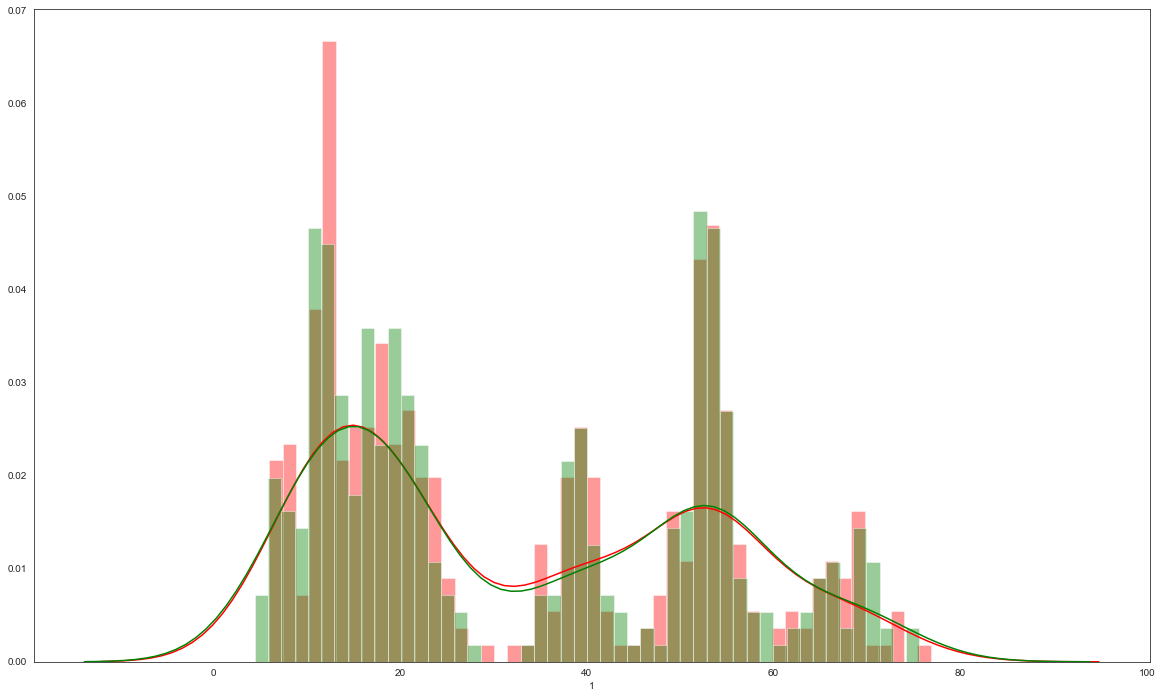

In [281]:
fig = plt.figure(figsize=(20,12))
#plt.plot(range(len(predictions)), predictions)
#plt.plot(range(len(test_y)), test_y)
#plt.show()
sns.distplot(predictions, bins=50, color='red')
sns.distplot(test_y, bins=50, color='green')

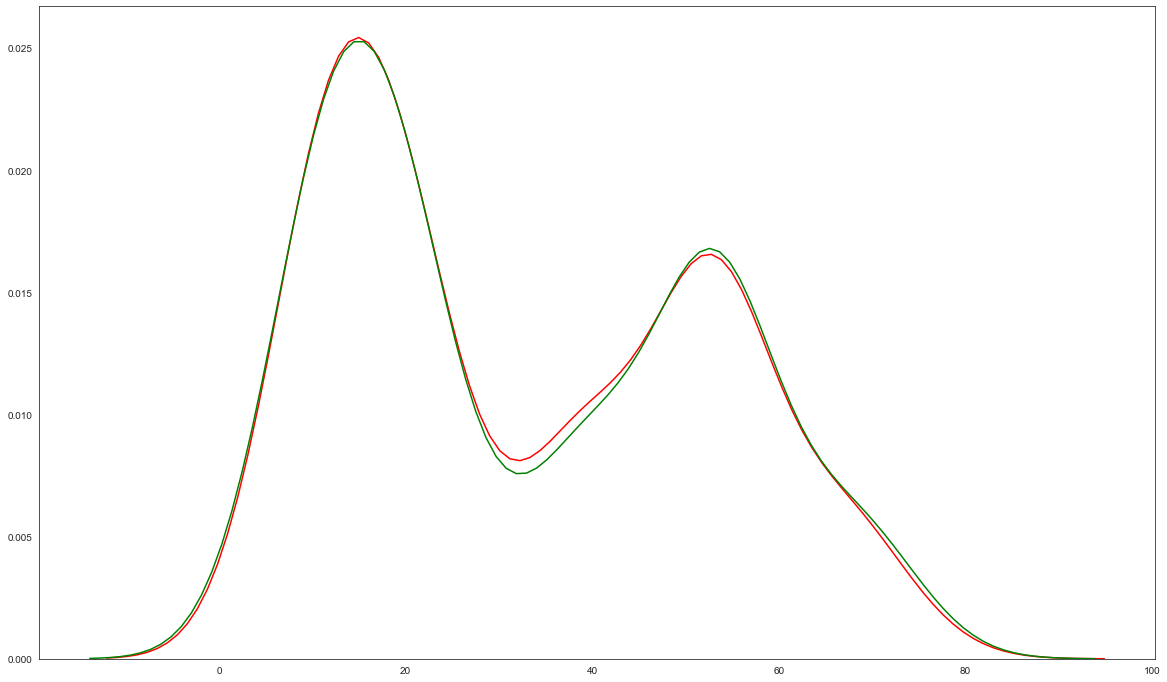

In [286]:
fig = plt.figure(figsize=(20,12))
#plt.plot(range(len(predictions)), predictions)
#plt.plot(range(len(test_y)), test_y)
#plt.show()
#sns.distplot(predictions, bins=50, color='red')
#sns.distplot(test_y, bins=50, color='green')
sns.kdeplot(predictions,legend=False,color='red')
sns.kdeplot(test_y,legend=False, color='green')

In [289]:
np.mean(predictions)

32.72724367712465